# Part I : Quel(le) data scientist êtes-vous ?
## Contexte de l’analyse

Elu métier le plus sexy par la Harvard Business Review en octobre 2012, le data scientist représente un profil rare qui exige de nombreuses compétences.

A partir d'un dataset Aquila, vous réaliserez :
- un clustering non supervisé afin d'identifier 2 groupes de profils techniques distinctes
- une prédiction des profils dont le métier n'est pas labellisé


## Données
data.csv contient 6 variables : 
    - 'Entreprise' correspond à une liste d'entreprises fictive
    - 'Metier' correspond au métier parmi data scientist, lead data scientist, data engineer et data architecte
    - 'Technologies' correspond aux compétences maîtrisées par le profil
    - 'Diplome' correspond à son niveau scolaire (Bac, Master, PhD,...)
    - 'Experience' correspond au nombre d'années d'expériences
    - 'Ville' correspond au lieu de travail
    


## Répondez aux questions 

Bonne chance!

In [1]:
# Import des libraries classique (numpy, pandas, ...)
import pandas as pd
import numpy as np
import re
import sklearn as sk
import seaborn as sb
from matplotlib import pyplot as plt
plt.style.use('ggplot')

### 1) Importer le tableau de données dans un dataframe 

In [2]:
# Import du dataframe "data.csv"
df = pd.read_csv("data.csv")

In [3]:
# Verfication de l'importation des données
df.head()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux


In [4]:
# Statistiques rapide
df.describe()

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
count,9565,9563,9582,9582,9488,9582
unique,1382,4,57,4,21,14
top,Ball Aerospace,Data scientist,SQL/R/Python//Big data,Master,"1,5",Paris
freq,748,3865,539,4971,1023,2015


### 2) Combien y a t-il d'observations dans ce dataset? Y a t-il des valeurs manquantes? 

In [5]:
# Dimension du Dataframe
shape = df.shape

print(f"Nous avons {shape[0]} observations")

Nous avons 9582 observations


In [6]:
# Compter les valeurs manquantes
count_nan = df.isnull().sum()

print('Nombres des valeurs manquantes présentes : \n' + str(count_nan))

Nombres des valeurs manquantes présentes : 
Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      94
Ville            0
dtype: int64


In [7]:
# Nombre total des valeurs manquantes  
# count_nan.sum()

print("Le nombre total des valeurs manquantes est :"  , count_nan.sum())

Le nombre total des valeurs manquantes est : 130


### 3) Réaliser l'imputation des valeurs manquantes pour la variable "Experience" avec : 
- la valeur médiane pour les data scientists
- la valeur moyenne pour les data engineers

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


In [9]:
# Avant de 
df.nunique(axis=0)

Entreprise      1382
Metier             4
Technologies      57
Diplome            4
Experience        21
Ville             14
dtype: int64

In [10]:
print(df['Metier'].unique())

['Data scientist' 'Data architecte' 'Lead data scientist' 'Data engineer'
 nan]


In [11]:
print(df['Metier'].value_counts())

Data scientist         3865
Data engineer          2347
Data architecte        2123
Lead data scientist    1228
Name: Metier, dtype: int64


In [12]:
df.groupby(['Metier']).count()

,Entreprise,Technologies,Diplome,Experience,Ville
Metier,,,,,
Data architecte,2119,2123,2123,2100,2123
Data engineer,2343,2347,2347,2327,2347
Data scientist,3860,3865,3865,3833,3865
Lead data scientist,1224,1228,1228,1209,1228


In [13]:
exp = df['Experience']

In [14]:
type(exp[100])

str

Nous pouvons remarquer que le type des valeurs dans la colonne Experience, sont de type str , et cela necessite une conversion en float, en changeant en amont la virgule en point.

In [15]:
df['Experience'] = df['Experience'].str.replace(',' , '.')
#df['Experience'] = df['Experience'].apply(lambda x: x.replace("," , "."))
#df.head()

In [16]:
df['Experience']

0         1
1         3
2         3
3       1.5
4       NaN
       ... 
9577    1.5
9578     11
9579      1
9580     17
9581      0
Name: Experience, Length: 9582, dtype: object

In [17]:
# conversion au float 
df['Experience']=df['Experience'].astype(float)

In [18]:
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1.0,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3.0,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3.0,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,1.5,Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,1.5,Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11.0,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1.0,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17.0,Rennes


In [ ]:
# Imputation 

In [19]:
#print (df)
cond_dataEng = (df['Metier'] == 'Data engineer')
cond_dataSci = (df['Metier'] == 'Data scientist')
#df.loc[m3,'b'] = df.loc[m3,'b'].fillna(df.loc[m3,'b'].median())

 ca pourra etre deux cas, imputation par la moyenne globale et la median
 ou ca pourra etre l'impuation de la moyenne des data scientist pour na des data scientists et la mediane des data engineers pour les na data engineers

In [20]:
df.loc[cond_dataSci,'Experience'] = df.loc[cond_dataSci,'Experience'].fillna(df.loc[cond_dataSci,'Experience'].mean())
df.loc[cond_dataEng,'Experience'] = df.loc[cond_dataEng,'Experience'].fillna(df.loc[cond_dataEng,'Experience'].median())
#df.loc[df[condition_dataEngineer,'Experience'].fillna(df['b'].median(), inplace=True)

In [21]:
# Verification d'imputation
df.loc[cond_dataSci,'Experience'].isnull().sum()

0

In [22]:
# Verification d'imputation
df.loc[cond_dataEng,'Experience'].isnull().sum()

0

In [23]:
# Nombre des variables manqantes pour la variable expérience 
df.Experience.isnull().sum()

42

 Nous avons 42 variables manquantes, restantes dans le dataframe

In [ ]:
# Imputation pour le reste a voir

### 4) Combien d'années d'expériences ont, en moyenne, chacun des profils : le data scientist, le lead data scientist et le data engineer en moyenne?

In [24]:
# 1er idée, de faire un filter de chaque profil puis calculer la la moyenne des années d'expérience,

# 2 eme idée, c'est de regrouper par metier, puis rajouter une une fonction d'aggregation qui calcule la moyene des année d'expérience

moyenne_exp_par_metier = df.groupby('Metier').agg({'Experience':'mean'})
moyenne_exp_par_metier

,Experience
Metier,
Data architecte,3.000476
Data engineer,2.980827
Data scientist,2.243282
Lead data scientist,3.965261


### 5) Faire la représentation graphique de votre choix afin de comparer le nombre moyen d'années d'expériences pour chaque métier

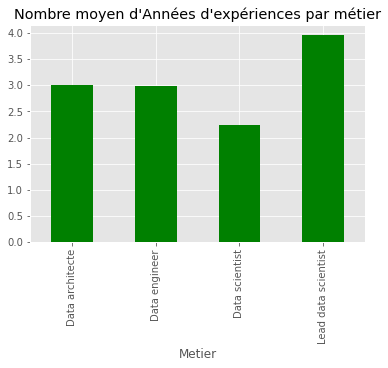

In [25]:
moyenne_exp_par_metier.plot.bar(title = "Nombre moyen d'Années d'expériences par métier", 
                                 color = 'green',
                                 legend = False)
plt.show()

### 6) Transformer la variable continue 'Experience' en une nouvelle variable catégorielle 'Exp_label' à 4 modalités: débutant, confirmé, avancé et expert
- Veuillez expliquer votre choix du règle de transformation.  

In [ ]:
# Transformation de la varibale Experience en 4 modalité,
# débutant 
# confirmé
# avancé
# expert

# 1 er idéee naive, soit en se basant sur une plateforme, puis faire la categorisation a la main, 
# nous pouvons appliquer ça et dire que pour un débutant, il a mois de 2 ans d'experience, confirmé avancé 
# selon ma vision en ce moment

# Autrement, faire cut de pandas, qui va categoriser en 4 variables, aléa

# faire une étude de cette population (échantillonage)



In [134]:
df.Experience.count()

9540

In [26]:
Exp_label = pd.cut(df['Experience'], bins=4, labels=("Débutant", "Confirmé", "Avancé", "Expert"))
df["Exp_label"] = pd.Series(Exp_label, index=df.index)

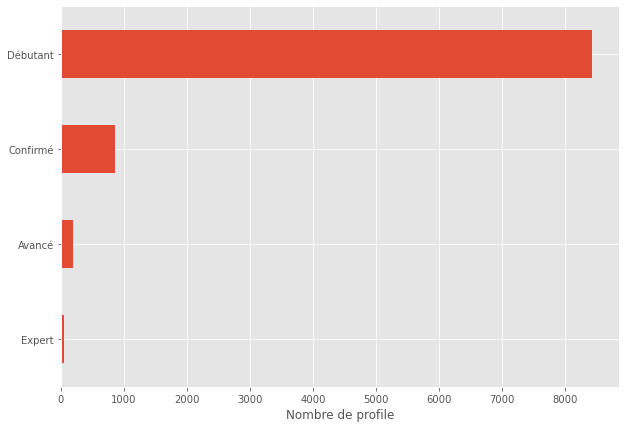

In [31]:
# Affichage des résultats
ax = pd.Series(df['Exp_label'].value_counts().values, index=df['Exp_label'].value_counts().keys()).plot.barh(figsize=(10,7))
#add_percentge(ax, x=+10.5, y=0.25) 
plt.xlabel("Nombre de profile")
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax.invert_yaxis()

### 7) Quelles sont les 5 technologies les plus utilisées? Faites un graphique

In [ ]:
# Ca peut necessiter un nettoyage, ou faire attention a divers term de la meme technologie, (scikit-learn et sklearn), 

In [ ]:
# Les 5 technologies les plus utilisés

In [52]:
technologies_serie = df.Technologies

In [51]:
res = re.compile(r'/')
if res.findall(c):
    print('Tout les employés ont au moins deux technologie')
else:
    print('Il un au mois un employé avec une seule technologie')

Il un au mois un employé avec une seule technologie


In [36]:
res = re.compile(r'/')
for technos in technologies_serie:
    if not res.findall(technos):
        print('Il un au mois un employé avec une seule technologie')

In [37]:
stock_techs = dict()
for technos in technologies_serie:       
    for tech in technos.split('/'):
        if tech in stock_techs.keys():
            stock_techs[tech] += 1
        else:
            stock_techs[tech] = 1

In [38]:
sorted_ = sorted(stock_techs.items(), key=lambda x:x[1], reverse=True)

In [46]:
Top_5_technologies = dict(sorted_[:5])

In [47]:
Top_5_technologies

{'Python': 6627, 'R': 4374, 'SQL': 2581, 'Java': 1719, 'Hadoop': 1589}

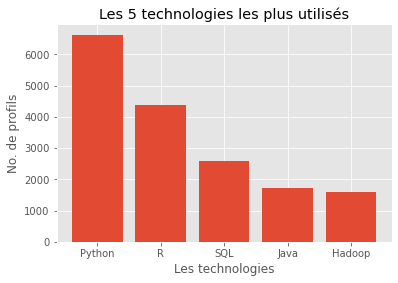

In [50]:
plt.bar(list(Top_5_technologies.keys()), list(Top_5_technologies.values()))
plt.xlabel("Les technologies")
plt.ylabel("No. de profils")
plt.title("Les 5 technologies les plus utilisés")
plt.show()

### 8) Réaliser une méthode de clustering non supervisée de votre choix pour faire apparaître 2 clusters que vous jugerez pertinents. Donnez les caractéristiques de chacun des clusters.
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  

### 9) Réaliser la prédiction des métiers manquants dans la base de données par l'algorithme de votre choix
-  Justifier la performance de votre algorithme grace à une métrique.
-  Interpréter votre resultat.  